![image-2.png](attachment:image-2.png)
_Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Actividad grupal: Explorando patrones ocultos: Detección de Anomalías en datos
## Objetivos

Mediante este trabajo se pretende que ponga en práctica la aplicación de las técnicas de detección de anomalías. El objetivo es analizar si existen anomalías en el conjunto de datos aplicando técnicas univariantes y multivariantes. Debe detallar los pasos que hay que realizar para detección de valores inusuales.

- 	Entender los métodos media móvil, z-score, Isolation Forest y Local Outlier Factor
- 	Implementar el código para cada una de estas técnicas y analizar si existen o no anomalía
- 
	Investigar sobre una técnica de detección de anomalías con un caso de uso concreto.

Descripción de la actividad

Debes realizar la actividad en el Notebook adjunto. Debes ir completando el código solicitado, así como responder a las preguntas que se van realizando.

Tareas que
- alizar
	Detección de 
- malías.
	Debes completar el código pedido en este notebook y contestar las pregunt
- finales.
	Buscar dos artículos científicos (https://scholar.google.es/) con un caso de uso de detección de anomalías. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de De
- Learning.
	Para cada artí
- O indicar:
o	Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la detección
-  anomalías.
o	Técnicas de detección de anoma
- s empleadas.
o	Principales resultados de la aplicación y de la investigación.


#### Integrantes del grupo

- David Requena Román

- Nicolás Lozano García

- Lucio Valcarce Palacio


## Detección de anomalías

Los transformadores juegan un papel muy importante en el sistema eléctrico. Aunque son algunos de los componentes más confiables de la red eléctrica, también son propensos a fallar debido a muchos factores, tanto internos como externos. Podría haber muchos iniciadores que causen una falla en el transformador, pero los que potencialmente pueden conducir a una falla catastrófica son los siguientes:
Falla mecánica
Falla dieléctrica

Contenido
Estos datos se recopilaron a través de dispositivos IoT desde el 25 de junio de 2019 hasta el 14 de abril de 2020 y se actualizaron cada 15 minutos.
El dataset contiene 19352 registros.
Descripción de los parámetros:
Voltaje de corriente:
1. VL1- Fase Línea 1
2. VL2- Fase Línea 2
3. VL3- Fase Línea 3
4. IL1- Línea actual 1
5. IL2- Línea actual 2
6. IL3- Línea actual 3
7. VL12- Línea de tensión 1 2
8. VL23- Línea de tensión 2 3
9. VL31- Línea de tensión 3 1
10. INUT-Corriente neutra

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# se carga el dataset, con separados ;, se transforman las dos columnas Date y Time a una única columna con tipo datetime
# en el fichero CSV existen NaN identificados por ?
df = pd.read_csv('CurrentVoltage.csv', sep=',') 

#### ¿Cuántas instancias tiene el dataset?

In [2]:
instance_num = len(df)
print(f"Hay {instance_num} instancias en el dataset.")

Hay 19352 instancias en el dataset.


#### ¿Cuál es el tipo de datos predominante en las variables?

In [3]:
data_types = df.dtypes
type_count = data_types.value_counts()


print(f"Tipos de datos presentes:\n{type_count}.")

Tipos de datos presentes:
float64    10
object      1
Name: count, dtype: int64.


El tipo de datos predominante es "float64".

## Variables nulas

#### ¿Tiene este dataset datos faltantes?

No, el dataset no tiene datos faltantes.

#### ¿Es necesario hacer algún tratamiendo adicional sobre los datos?

Si, es recomendable normalizar los datos, así que eso haremos.  
Además, la columna "DeviceTimeStamp", de tipo object, que referencia el momento en el que se tomó la medida no tiene relevancia para el análisis que vamos a realizar, por lo que será eliminada del dataset.

In [4]:
from sklearn.preprocessing import normalize

df.drop('DeviceTimeStamp', axis=1, inplace=True)

scaled_features = normalize(df)

df_scaled = pd.DataFrame(scaled_features, columns=df.columns)

print("Variables del dataset escaladas:")
print(df_scaled.head())

Variables del dataset escaladas:
        VL1       VL2       VL3  IL1  IL2  IL3  VL12  VL23  VL31  INUT
0  0.000000  0.000000  0.000000  0.0  0.0  0.0   0.0   0.0   0.0   0.0
1  0.577270  0.577270  0.577511  0.0  0.0  0.0   0.0   0.0   0.0   0.0
2  0.577189  0.577431  0.577431  0.0  0.0  0.0   0.0   0.0   0.0   0.0
3  0.577190  0.577430  0.577430  0.0  0.0  0.0   0.0   0.0   0.0   0.0
4  0.577190  0.577430  0.577430  0.0  0.0  0.0   0.0   0.0   0.0   0.0


#### Media móvil

In [5]:
# Vamos a aplicar la técnica de detección de anomalías de Media Móvil sobre la variable INUT

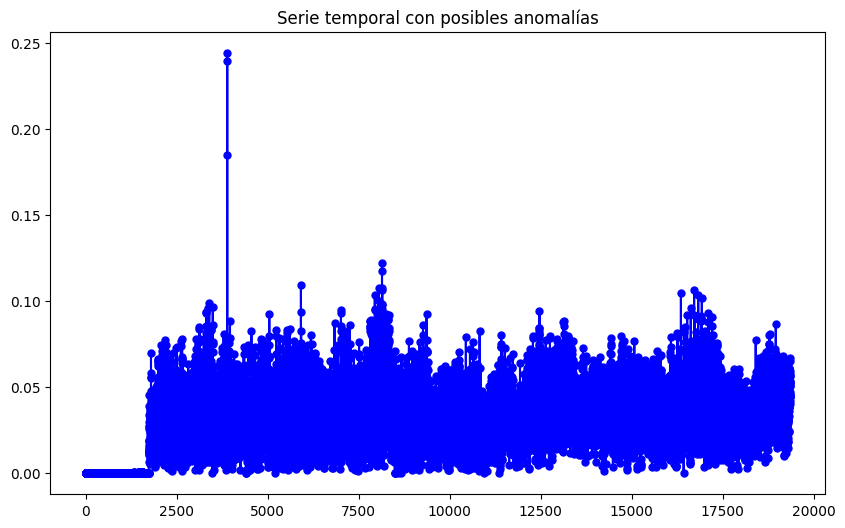

In [6]:
# Calcula la media móvil
data = df_scaled["INUT"]

plt.figure(figsize=(10, 6))
plt.plot(data, 'bo-', markersize=5)
plt.title('Serie temporal con posibles anomalías')
plt.show()

In [7]:
# Define un umbral para detectar anomalías
# Definir la ventana para la media móvil
window_size = 50
# Calcular la media móvil
rolling_mean = np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Calcular la desviación estándar de la ventana móvil
rolling_std = np.array([np.std(data[i:i+window_size]) for i in range(len(data) - window_size + 1)])
# Definir el umbral para considerar un punto como anomalía (por ejemplo, 2 desviaciones estándar)
threshold = 5
# Identificar anomalías
anomalies = []
for i in range(len(rolling_mean)):
    if np.abs(data[i + window_size - 1] - rolling_mean[i]) > threshold * rolling_std[i]:
     anomalies.append(i + window_size - 1)

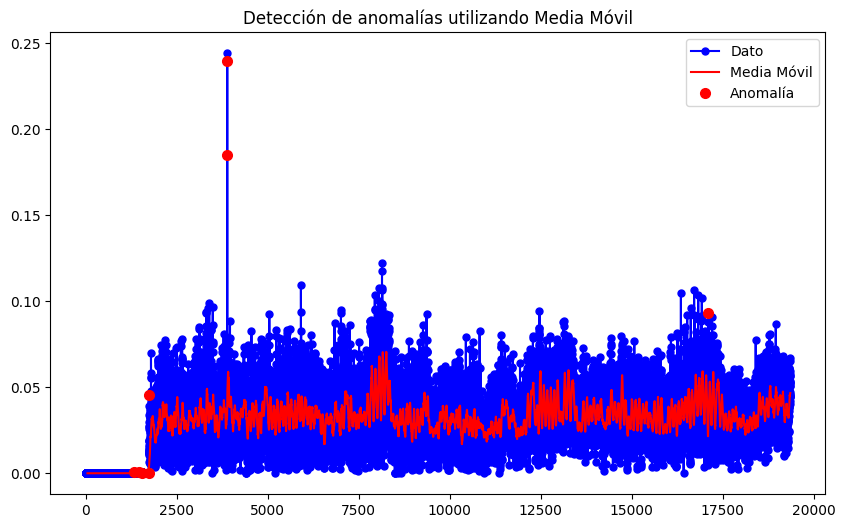

Anomalías detectadas:
1330     0.000943
1469     0.000469
1555     0.000000
1729     0.000123
1731     0.045281
3886     0.185147
3887     0.239465
17096    0.092935
Name: INUT, dtype: float64


In [8]:
# Visualiza los resultados
# Mostrar los datos, la media móvil y las anomalías
plt.figure(figsize=(10, 6))
plt.plot(data, 'bo-', markersize=5, label='Dato')
plt.plot(range(window_size - 1, len(data)), rolling_mean, 'r-',
label='Media Móvil')
plt.plot(anomalies, data[anomalies], 'ro', markersize=7, label='Anomalía')
plt.title('Detección de anomalías utilizando Media Móvil')
plt.legend()
plt.show()
# Imprimir las anomalías detectadas
print(f'Anomalías detectadas:\n{data[anomalies]}')

Se ha definido un "window-size" de 50 para tener en cuenta como cambia la variable sin que se consideren las anomalías cuando la serie se aleja de ellas.  
Por otro lado, el "threshold" para definir qué se considera una anomalía ha sido establecio en cinco veces la desviación estandar teniendo en cuenta que hay una constante fluctuación entre valores mínimos y máximos (locales).

#### Z-Score

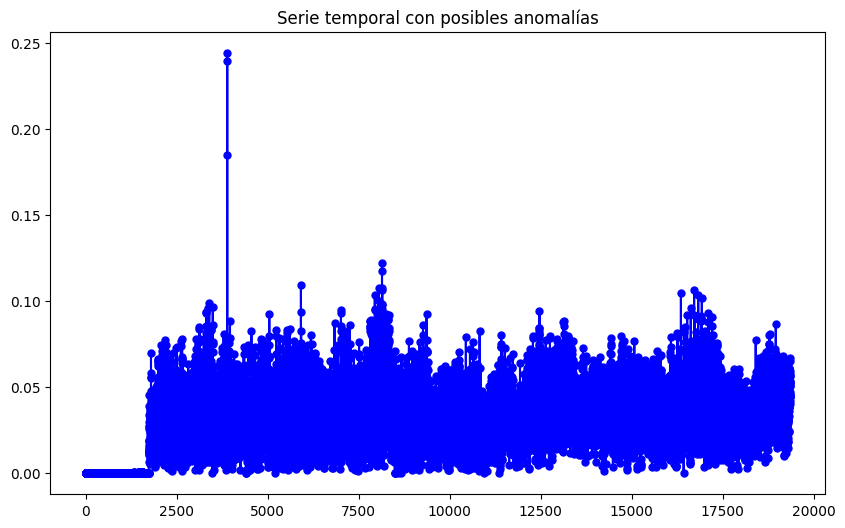

Media: 0.03106925942165106
DesvEsta: 0.017962493199056944
Z-Scores: [-1.72967411 -1.72967411 -1.72967411 ...  0.77287403  1.18555857
  1.26407675]


In [14]:
# Vamos a aplicar la técnica de detección de anomalías Z-Score
# Pon aquí tu código

plt.figure(figsize=(10, 6))
plt.plot(data, 'bo-', markersize=5)
plt.title('Serie temporal con posibles anomalías')
plt.show()

from scipy import stats
# Calcular la media y desviación estándar
mean = np.mean(data)
std_dev = np.std(data)
# Calcular el Z-Score
z_scores = stats.zscore(data)

print(f"Media: {mean}\nDesvEsta: {std_dev}\nZ-Scores: {z_scores}")

In [10]:
# Define un umbral para detectar anomalías (por ejemplo, 3 desviaciones estándar)
# Determinar los umbrales para marcar anomalías
threshold = 3
anomalies = np.where(np.abs(z_scores) > threshold)
print(anomalies)


(array([ 3123,  3305,  3309,  3315,  3318,  3359,  3393,  3487,  3490,
        3886,  3887,  3888,  3963,  5043,  5911,  5912,  6834,  7006,
        7010,  7011,  7248,  7818,  7819,  7821,  7822,  7849,  7939,
        7940,  7941,  7943,  8028,  8036,  8039,  8041,  8043,  8044,
        8045,  8046,  8047,  8135,  8136,  8137,  8138,  8139,  8140,
        8141,  8144,  8145,  8228,  8235,  8238,  8239,  8240,  8309,
        8314,  8332,  9264,  9362, 12463, 13115, 13135, 13136, 16348,
       16456, 16521, 16618, 16711, 16717, 16824, 16826, 16909, 16912,
       16919, 16922, 17096, 17103, 17200, 17201, 18953]),)


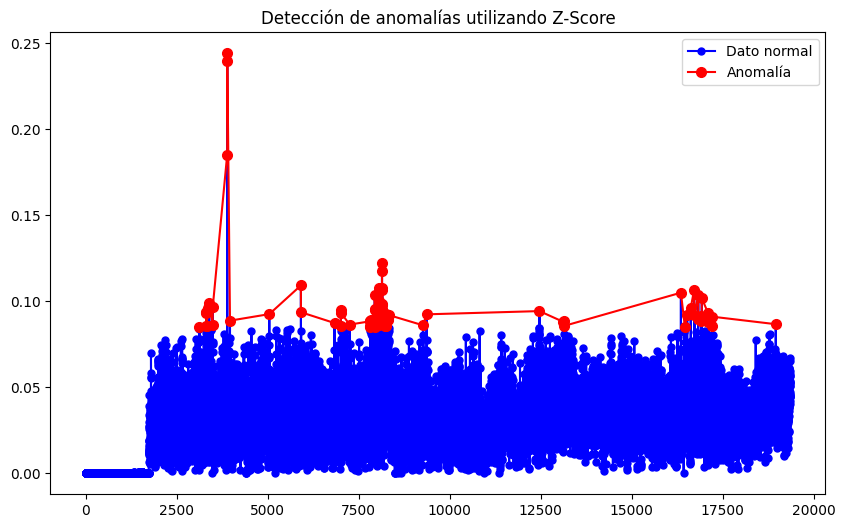

Anomalías detectadas: 3123     0.085082
3305     0.085563
3309     0.093179
3315     0.093715
3318     0.085379
           ...   
17096    0.092935
17103    0.088035
17200    0.085788
17201    0.091034
18953    0.086645
Name: INUT, Length: 79, dtype: float64


In [18]:
# Visualiza los resultados
# Mostrar los datos y marcar las anomalías
plt.figure(figsize=(10, 6))
plt.plot(data, 'bo-', markersize=5, label='Dato normal')
plt.plot(anomalies[0], data.iloc[anomalies[0]], 'ro-', markersize=7, label='Anomalía')
plt.title('Detección de anomalías utilizando Z-Score')
plt.legend()
plt.show()
# Imprimir las anomalías detectadas
print(f'Anomalías detectadas: {data.iloc[anomalies[0]]}')

#### Isolation Forest

In [ ]:
# Vamos a aplicar la técnica de detección de anomalías de Isolation Forest, configura el parámetro contamination en 5%
# Pon aquí tu código
from sklearn.ensemble import IsolationForest
model = IsolationForest(contamination=0.05)


         VL1    VL2    VL3   IL1   IL2   IL3   VL12   VL23   VL31  INUT  \
0        0.0    0.0    0.0   0.0   0.0   0.0    0.0    0.0    0.0   0.0   
1      238.7  238.7  238.8   0.0   0.0   0.0    0.0    0.0    0.0   0.0   
2      238.4  238.5  238.5   0.0   0.0   0.0    0.0    0.0    0.0   0.0   
3      239.9  240.0  240.0   0.0   0.0   0.0    0.0    0.0    0.0   0.0   
4      239.9  240.0  240.0   0.0   0.0   0.0    0.0    0.0    0.0   0.0   
...      ...    ...    ...   ...   ...   ...    ...    ...    ...   ...   
19347  246.4  244.7  244.3  79.0  45.4  86.6  426.0  422.3  426.1  38.0   
19348  246.8  245.1  244.8  77.0  42.0  84.2  426.8  423.1  427.1  39.1   
19349  247.8  246.0  246.0  77.4  37.1  75.4  428.5  425.0  428.7  38.8   
19350  247.7  245.9  245.5  70.1  36.7  88.1  428.2  424.3  428.4  45.2   
19351  248.4  246.6  246.3  59.2  33.1  86.8  429.4  425.4  430.0  46.5   

       anomaly_score  anomaly  
0                 -1     True  
1                  1    False  
2  

In [26]:
# Agrega las columnas de puntaje y si es dato anómalo o no en el dataframe
df['anomaly_score'] = model.fit_predict(df)

# Filtrar anomalías
df['anomaly'] = df['anomaly_score'] == -1
print(df)

         VL1    VL2    VL3   IL1   IL2   IL3   VL12   VL23   VL31  INUT  \
0        0.0    0.0    0.0   0.0   0.0   0.0    0.0    0.0    0.0   0.0   
1      238.7  238.7  238.8   0.0   0.0   0.0    0.0    0.0    0.0   0.0   
2      238.4  238.5  238.5   0.0   0.0   0.0    0.0    0.0    0.0   0.0   
3      239.9  240.0  240.0   0.0   0.0   0.0    0.0    0.0    0.0   0.0   
4      239.9  240.0  240.0   0.0   0.0   0.0    0.0    0.0    0.0   0.0   
...      ...    ...    ...   ...   ...   ...    ...    ...    ...   ...   
19347  246.4  244.7  244.3  79.0  45.4  86.6  426.0  422.3  426.1  38.0   
19348  246.8  245.1  244.8  77.0  42.0  84.2  426.8  423.1  427.1  39.1   
19349  247.8  246.0  246.0  77.4  37.1  75.4  428.5  425.0  428.7  38.8   
19350  247.7  245.9  245.5  70.1  36.7  88.1  428.2  424.3  428.4  45.2   
19351  248.4  246.6  246.3  59.2  33.1  86.8  429.4  425.4  430.0  46.5   

       anomaly_score  anomaly  
0                 -1     True  
1                  1    False  
2  

C:\Users\Nico Lozano\AppData\Local\Temp\ipykernel_2608\2458068779.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=anomaly_counts.index, y=anomaly_counts.values, palette=['green', 'red'])


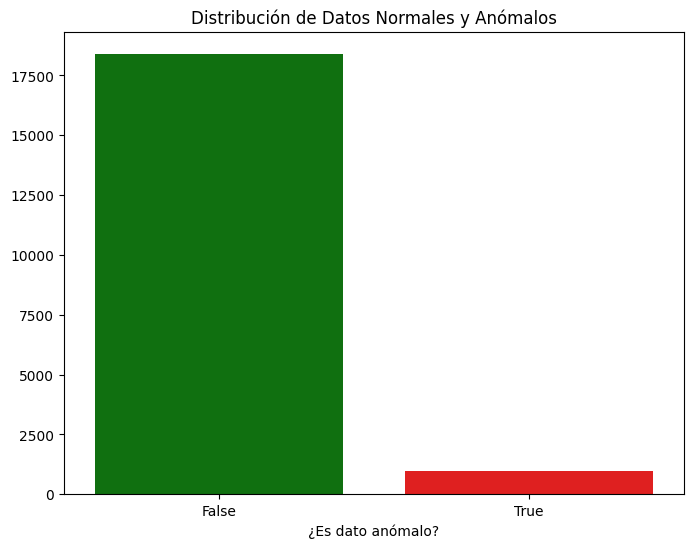

In [32]:
# Crea un gráfico de barras para mostrar los datos anómalos vs los datos normales
anomaly_counts = df['anomaly'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=anomaly_counts.index, y=anomaly_counts.values, palette=['green', 'red'])
plt.title('Distribución de Datos Normales y Anómalos')
plt.xlabel('¿Es dato anómalo?')
plt.show()

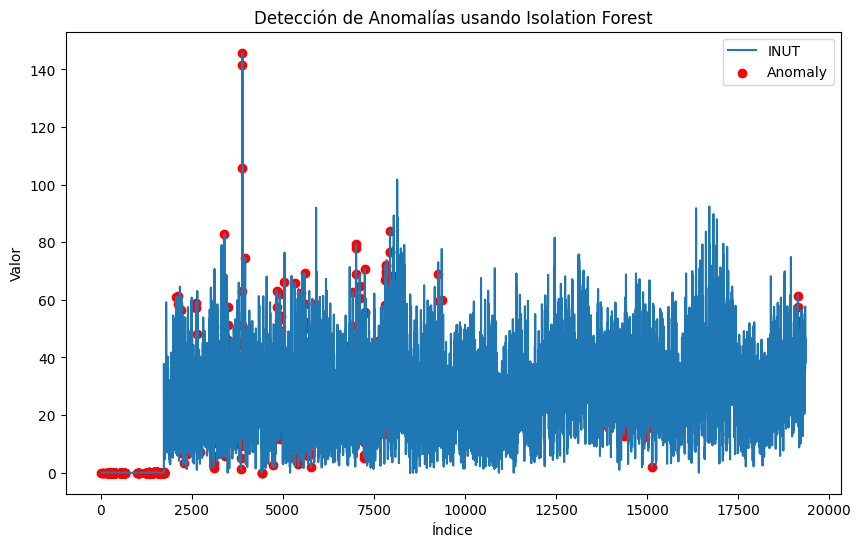

In [33]:
# Crea un gráfico donde se puedan ver los datos anómalos sobre la variable INUT.
# Visualizar resultados
plt.figure(figsize=(10, 6))
plt.plot(df['INUT'], label='INUT')
plt.scatter(df[df['anomaly']].index, df[df['anomaly']]['INUT'], color='red', label='Anomaly')
plt.title('Detección de Anomalías usando Isolation Forest')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.show()

         VL1    VL2    VL3   IL1   IL2   IL3   VL12   VL23   VL31  INUT  \
0        0.0    0.0    0.0   0.0   0.0   0.0    0.0    0.0    0.0   0.0   
1      238.7  238.7  238.8   0.0   0.0   0.0    0.0    0.0    0.0   0.0   
2      238.4  238.5  238.5   0.0   0.0   0.0    0.0    0.0    0.0   0.0   
3      239.9  240.0  240.0   0.0   0.0   0.0    0.0    0.0    0.0   0.0   
4      239.9  240.0  240.0   0.0   0.0   0.0    0.0    0.0    0.0   0.0   
...      ...    ...    ...   ...   ...   ...    ...    ...    ...   ...   
19347  246.4  244.7  244.3  79.0  45.4  86.6  426.0  422.3  426.1  38.0   
19348  246.8  245.1  244.8  77.0  42.0  84.2  426.8  423.1  427.1  39.1   
19349  247.8  246.0  246.0  77.4  37.1  75.4  428.5  425.0  428.7  38.8   
19350  247.7  245.9  245.5  70.1  36.7  88.1  428.2  424.3  428.4  45.2   
19351  248.4  246.6  246.3  59.2  33.1  86.8  429.4  425.4  430.0  46.5   

       anomaly_score  anomaly  anomaly_score_1pc  anomaly_1pc  
0                 -1     True      

C:\Users\Nico Lozano\AppData\Local\Temp\ipykernel_2608\150309725.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=anomaly_counts_1pc.index, y=anomaly_counts_1pc.values, palette=['green', 'red'])


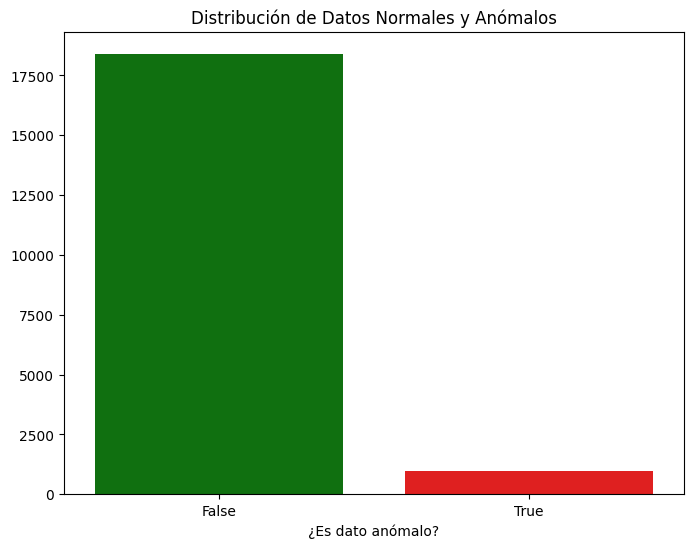

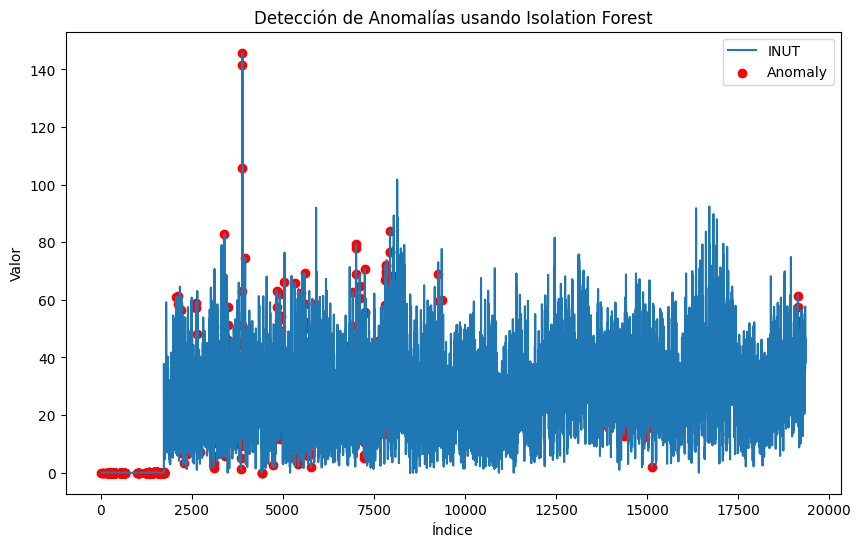

In [34]:
# Repite los pasos anteriores con el parámetro de contamination en 1%
model_1pc = IsolationForest(contamination=0.05)

# Agrega las columnas de puntaje y si es dato anómalo o no en el dataframe
df['anomaly_score_1pc'] = model_1pc.fit_predict(df)

# Filtrar anomalías
df['anomaly_1pc'] = df['anomaly_score_1pc'] == -1
print(df)

# Crea un gráfico de barras para mostrar los datos anómalos vs los datos normales
anomaly_counts_1pc = df['anomaly_1pc'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=anomaly_counts_1pc.index, y=anomaly_counts_1pc.values, palette=['green', 'red'])
plt.title('Distribución de Datos Normales y Anómalos')
plt.xlabel('¿Es dato anómalo?')
plt.show()

# Crea un gráfico donde se puedan ver los datos anómalos sobre la variable INUT.
# Visualizar resultados
plt.figure(figsize=(10, 6))
plt.plot(df['INUT'], label='INUT')
plt.scatter(df[df['anomaly_1pc']].index, df[df['anomaly_1pc']]['INUT'], color='red', label='Anomaly')
plt.title('Detección de Anomalías usando Isolation Forest')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.show()

## Local Outlier Factor

In [ ]:
# Vamos a aplicar la técnica de detección de anomalías de Local Outlier Factor
# Pon aquí tu código

In [ ]:
# Crea un gráfico de barras para mostrar los datos anómalos vs los datos normales

In [ ]:
# Crea un gráfico donde se puedan ver los datos anómalos sobre la variable INUT.

## Análisis

In [ ]:
# Realiza un análisis detallado de los resultados obtenidos en cada una de las técnicas aplicadas. Utiliza gráficos o trablas para apoyar tu conclusiones

## Artículos de investigación

#### Artículo 1

In [ ]:
# Coloca en este espacio el análisis del artículo 1

#### Artículo 2

In [ ]:
# Coloca en este espacio el análisis del artículo 2